In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "B"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474345 entries, 0 to 474344
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     474345 non-null  int64  
 1   ts                             474345 non-null  object 
 2   instanceID                     474345 non-null  object 
 3   AoARel                         397590 non-null  float64
 4   bladePitch                     397591 non-null  float64
 5   bladePitchMax                  397591 non-null  float64
 6   bladePitchMin                  397591 non-null  float64
 7   bladePitchSetPoint             0 non-null       float64
 8   bladePitchStd                  0 non-null       float64
 9   cP                             397590 non-null  float64
 10  generatorTorque                391183 non-null  float64
 11  rotorTorque                    378512 non-null  float64
 12  TI                            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474345 entries, 0 to 474344
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  474345 non-null  int64 
 1   ts          474345 non-null  object
 2   instanceID  474345 non-null  object
 3   value       474345 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 14.5+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

9
['B_WTG01' 'B_WTG02' 'B_WTG03' 'B_WTG04' 'B_WTG05' 'B_WTG06' 'B_WTG07'
 'B_WTG08' 'B_WTG09']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
18651,2020-01-15 09:20:00,1,15,9,B_WTG04,11.992290,1.231379,10.268089,6.669166,2060.033645,1
189735,2020-05-26 09:30:00,5,26,9,B_WTG07,6.381704,0.597067,9.355916,16.942373,478.199461,1
290310,2020-08-12 00:00:00,8,12,0,B_WTG07,NaN,NaN,NaN,NaN,NaN,0
106677,2020-03-23 07:30:00,3,23,7,B_WTG01,7.526785,0.708597,9.414338,2.705833,875.260884,1
133069,2020-04-12 16:10:00,4,12,16,B_WTG05,5.494958,0.690770,12.570986,9.430000,306.851706,1


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,474345.000000,474345.000000,474345.000000,397699.000000,397699.000000,397590.000000,397699.000000,397699.000000,474345.000000
mean,6.513557,15.756551,11.499782,6.819401,0.934767,14.996683,10.379998,753.845539,0.692011
std,3.451288,8.811690,6.922309,3.621089,0.529938,7.379986,4.192454,740.621478,0.461662
min,1.000000,1.000000,0.000000,-0.320975,0.000000,0.000000,0.964167,-18.515779,0.000000
25%,4.000000,8.000000,5.000000,4.223810,0.564860,10.711638,7.163333,96.971225,0.000000
50%,7.000000,16.000000,11.000000,6.257634,0.828396,13.516626,9.849166,473.921865,1.000000
75%,10.000000,23.000000,17.000000,8.910869,1.179292,17.190913,13.230833,1379.992330,1.000000
max,12.000000,31.000000,23.000000,26.959978,6.818130,155.601077,25.436667,2068.491032,1.000000


### Plot time series

In [13]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

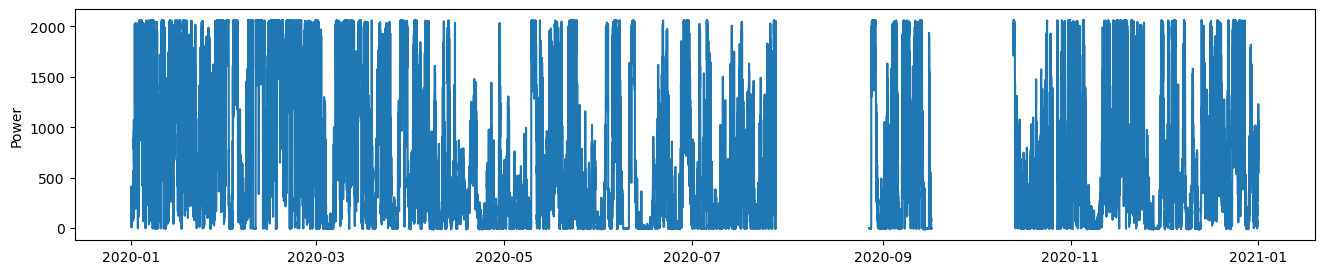

In [14]:
func.plot_timeseries(data_01, 'Power')

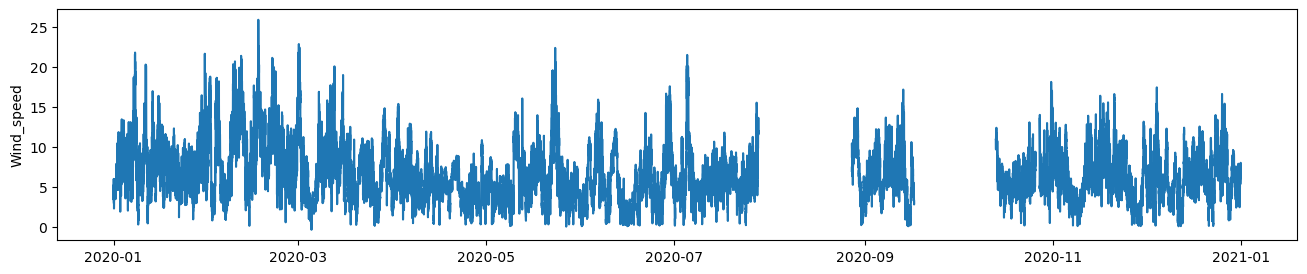

In [15]:
func.plot_timeseries(data_01, 'Wind_speed')

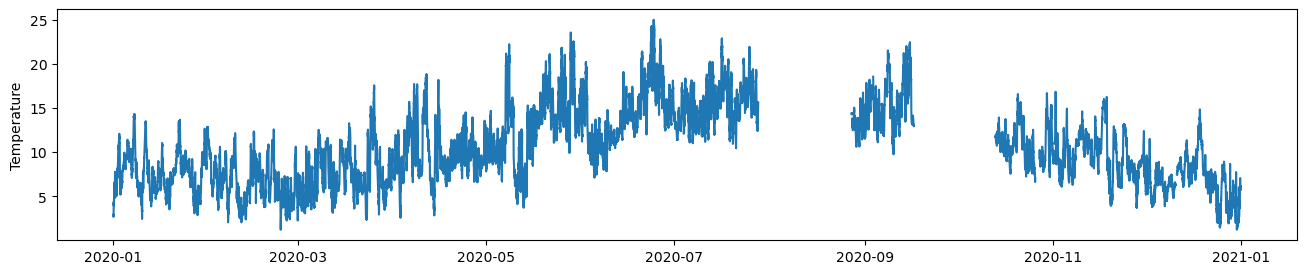

In [16]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [17]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

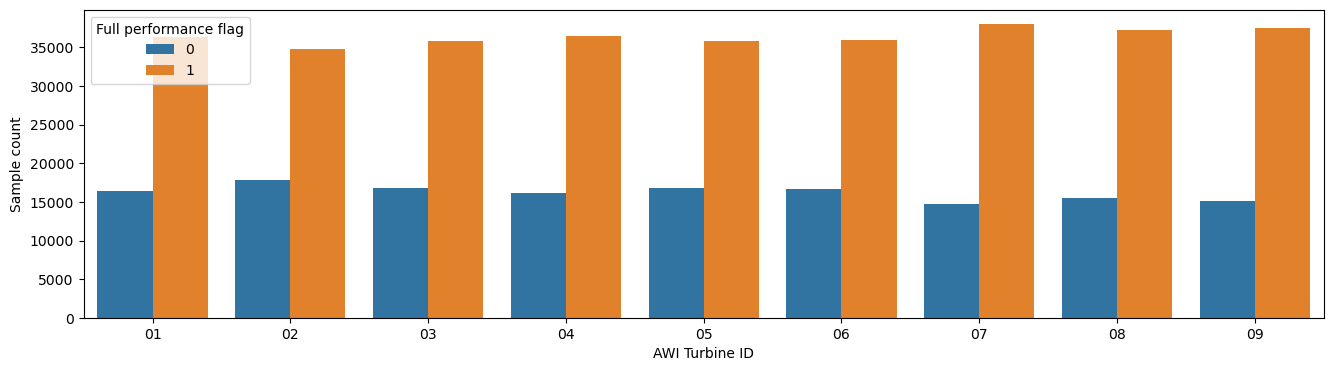

In [18]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "v")

In [19]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value', 'Wind_speed_sd'])

In [20]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
0,2020-01-01,1,1,0,B_WTG01,5.095141,13.611685,2.929167,348.153622
1,2020-01-01,1,1,0,B_WTG02,5.087110,10.913946,2.992500,374.113193
2,2020-01-01,1,1,0,B_WTG03,7.328426,8.273928,2.970833,815.915979
3,2020-01-01,1,1,0,B_WTG04,7.127246,7.414767,2.832500,867.836771
4,2020-01-01,1,1,0,B_WTG05,7.359853,8.167022,3.052500,744.700635
...,...,...,...,...,...,...,...,...,...
474340,2021-01-01,1,1,0,B_WTG05,5.275089,22.499540,6.198333,387.274779
474341,2021-01-01,1,1,0,B_WTG06,5.377703,21.318671,5.742500,396.324043
474342,2021-01-01,1,1,0,B_WTG07,4.329758,18.476535,5.801667,210.556521
474343,2021-01-01,1,1,0,B_WTG08,6.097418,17.791033,5.692500,463.653817


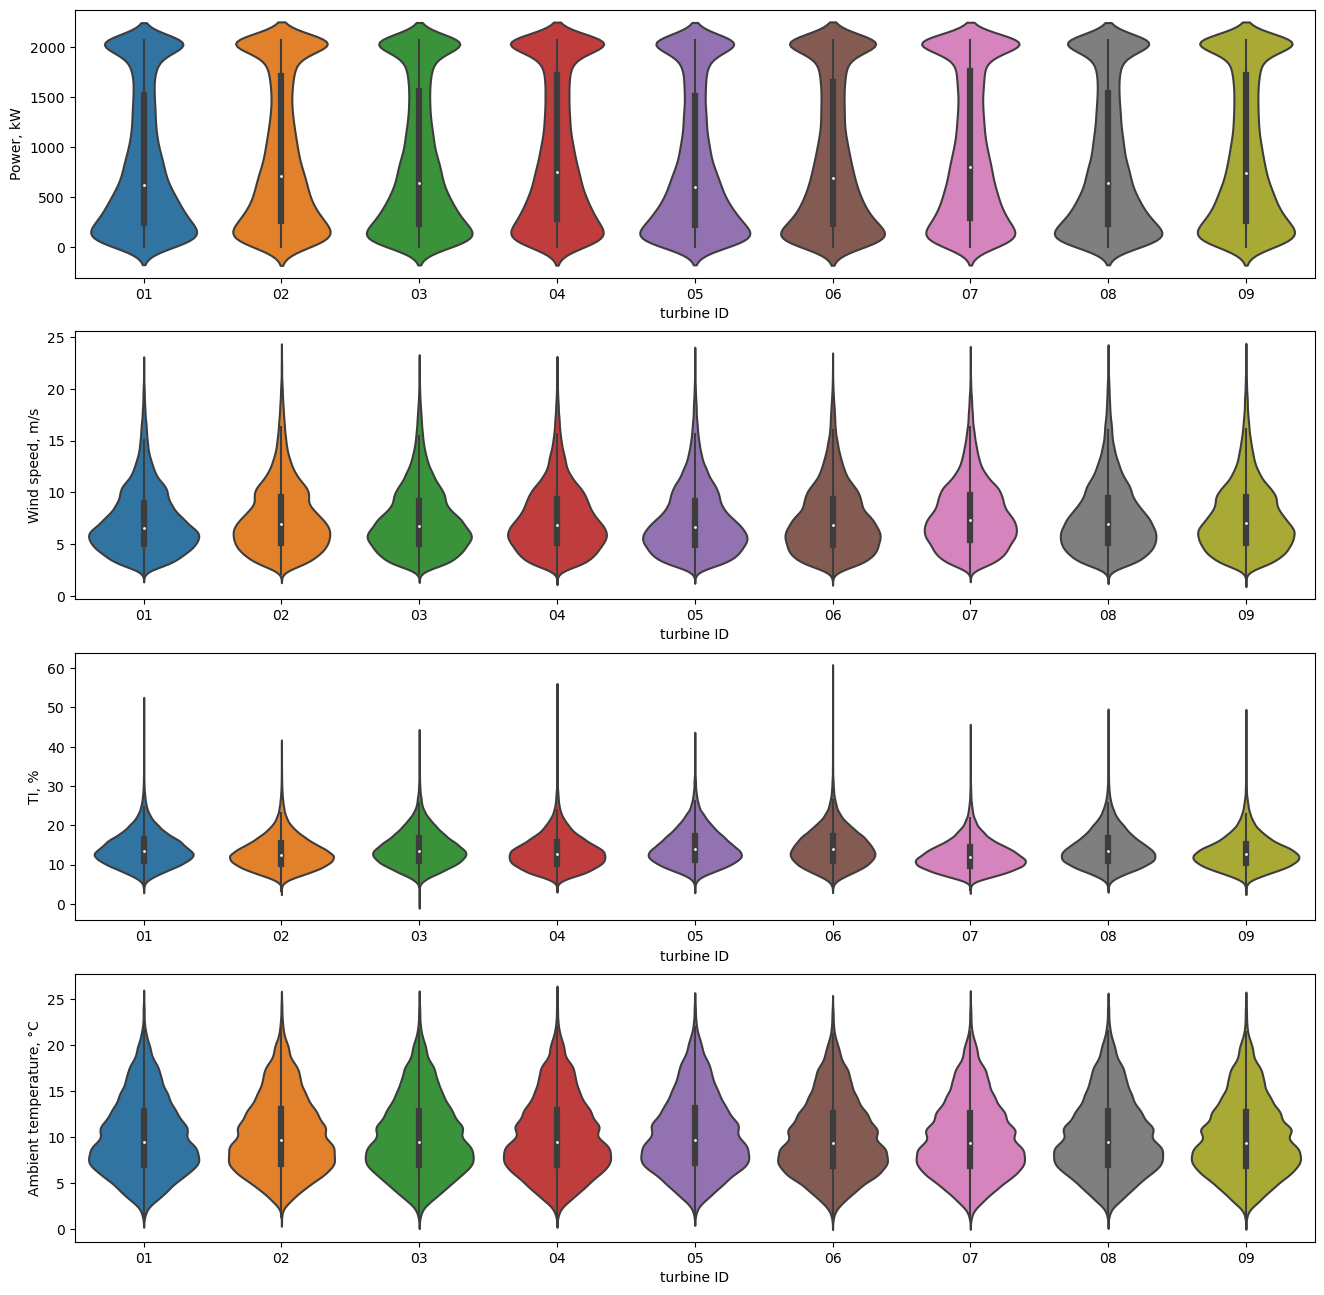

In [21]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(16, 16), orient = "v")

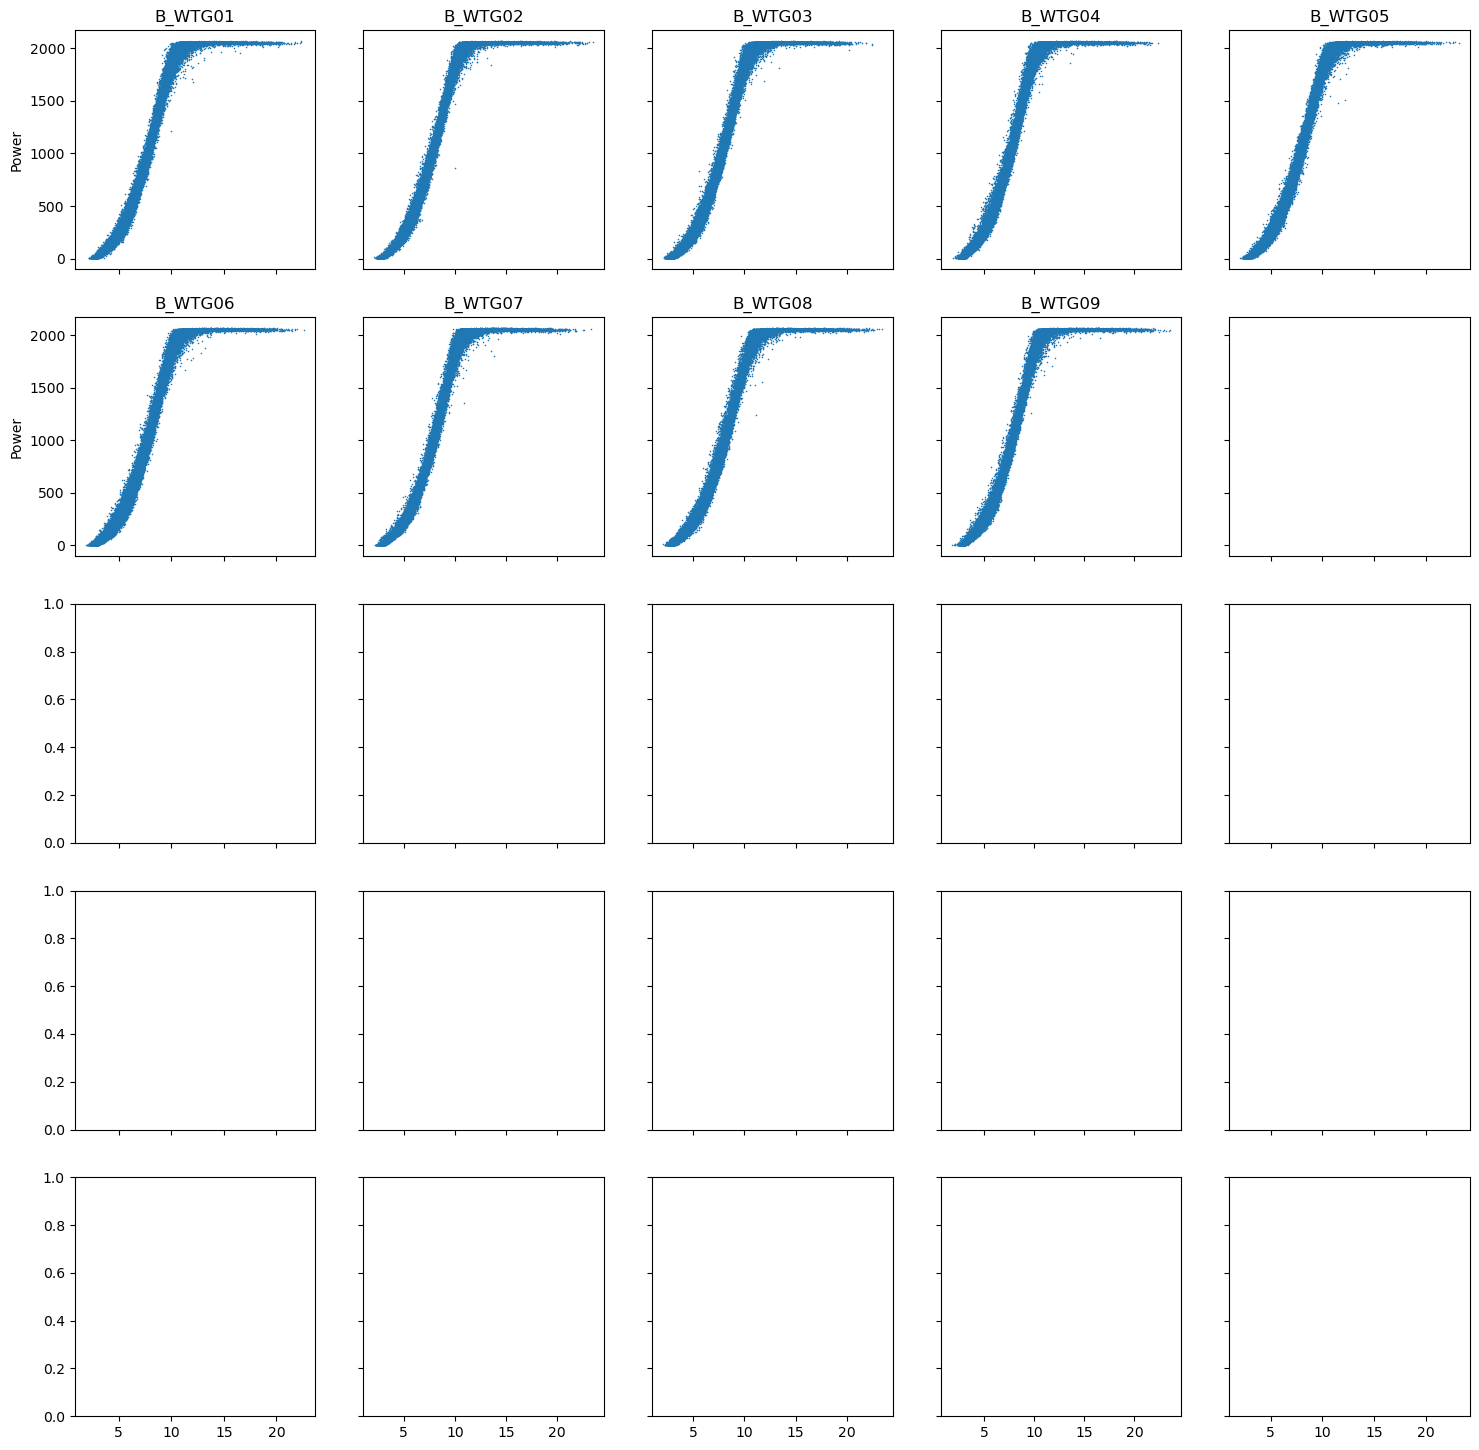

In [22]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

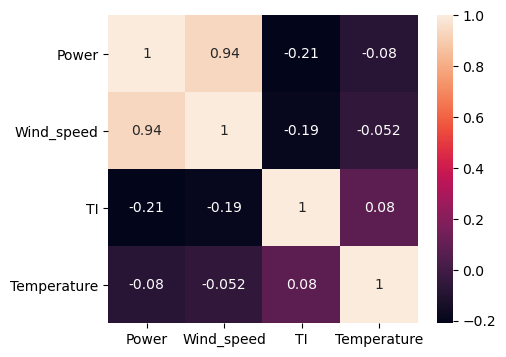

In [23]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

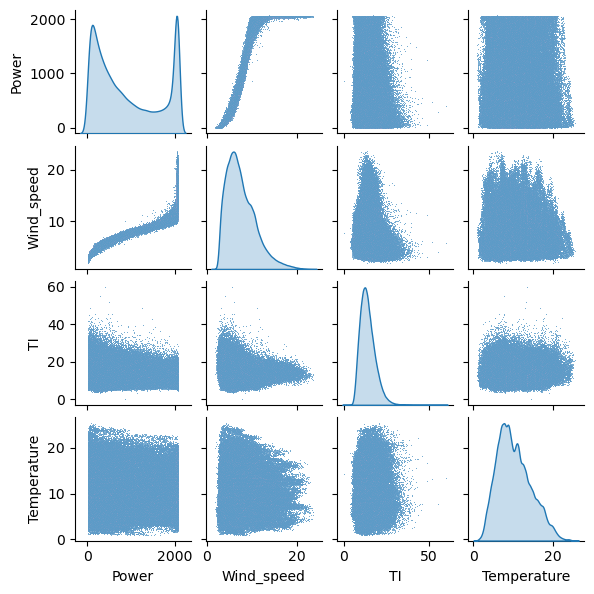

In [24]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

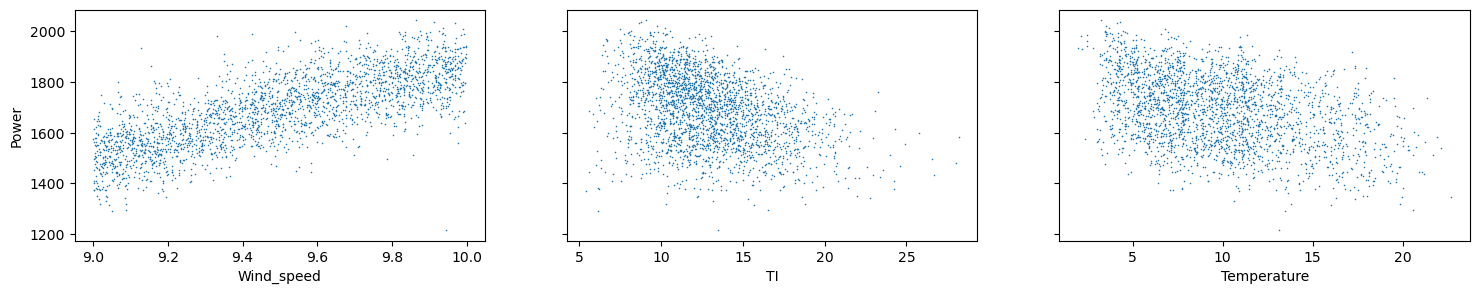

In [25]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

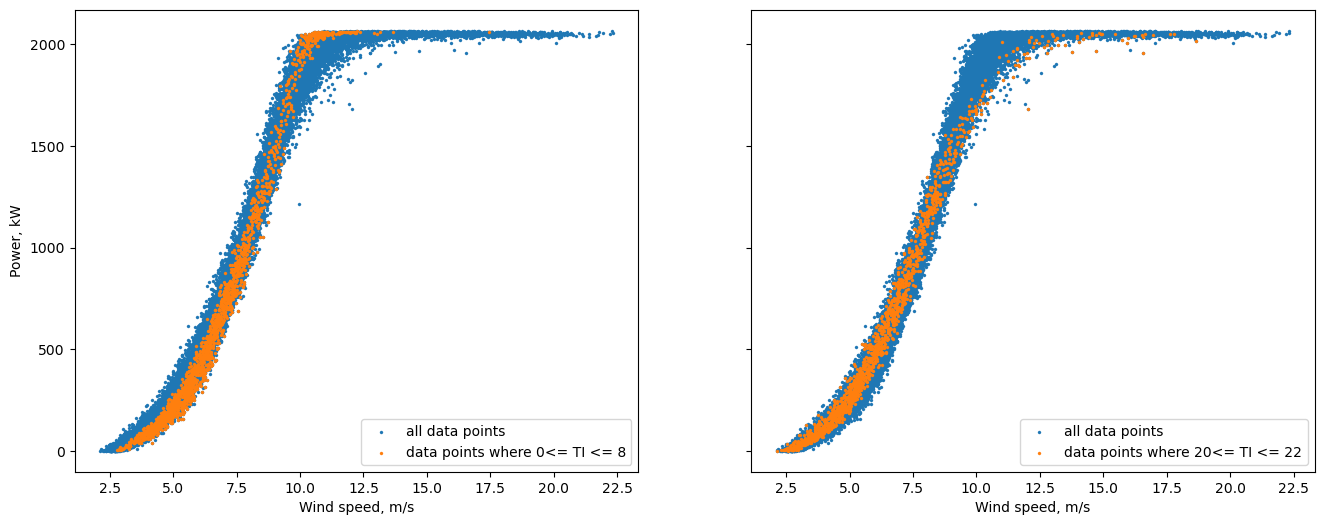

In [26]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (0,8), ws_range2 = (20,22), figsize=(16,6))

### fit and save Standardscaler

In [27]:
from sklearn.preprocessing import StandardScaler
import pickle

In [28]:
# fit standardscaler and save it for later use (remove the mean and scale to unit variance)
scalerX = StandardScaler()
scalerX.fit(data_clean.iloc[:, 5:-1])
scalerY = StandardScaler()
scalerY.fit(data_clean.iloc[:, -1:])

StandardScaler()

In [29]:
# get parent directory
os.chdir("..")
directory = 'Data_clean'
scaler_nameX = site + "_scalerX.pkl"
scaler_nameY = site + "_scalerY.pkl"

# save 
pickle.dump(scalerX, open(os.path.join(os.getcwd(), directory, scaler_nameX),'wb'))
pickle.dump(scalerY, open(os.path.join(os.getcwd(), directory, scaler_nameY),'wb'))


### Sample data

In [30]:
# define sample size for pretraining (for a wind farm) 
# These pretraining samples are only used for neural networks. 
pretrain_size = 200000

# sample the data.
data_pretrain = data_clean.sample(pretrain_size, random_state = 64)

data_pretrain

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
138152,2020-04-16 14:20:00,4,16,14,B_WTG03,6.523315,14.793633,9.560833,549.446729
131105,2020-04-11 03:50:00,4,11,3,B_WTG03,9.431275,9.996612,14.752500,1551.475181
133812,2020-04-13 06:00:00,4,13,6,B_WTG01,8.824591,13.214316,5.325834,1506.357247
402684,2020-11-06 17:00:00,11,6,17,B_WTG07,7.817684,7.973029,9.236667,818.734091
133434,2020-04-12 23:00:00,4,12,23,B_WTG01,10.472565,13.197518,6.921667,1922.453479
...,...,...,...,...,...,...,...,...,...
19534,2020-01-16 01:40:00,1,16,1,B_WTG05,7.261685,13.440981,7.627500,801.809161
311540,2020-08-28 09:10:00,8,28,9,B_WTG06,10.604556,10.357310,13.433333,1991.606899
109570,2020-03-25 13:00:00,3,25,13,B_WTG05,5.828079,21.125860,16.539167,422.532817
428278,2020-11-26 11:00:00,11,26,11,B_WTG05,4.631578,9.697958,8.899166,137.786124


In [31]:
# define sample size for training (for each turbine)
# For neural networks, these training samples are used for fine tuning. 
train_size = 10000

# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, random_state = 22))

data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
238266,2020-07-02 20:20:00,7,2,20,B_WTG01,4.804399,13.560919,13.255833,220.966671
333405,2020-09-14 06:10:00,9,14,6,B_WTG01,3.120800,14.110792,15.298334,23.863499
387018,2020-10-25 15:00:00,10,25,15,B_WTG01,7.617583,17.007185,12.080833,871.045278
460269,2020-12-21 03:30:00,12,21,3,B_WTG01,5.582727,17.954109,7.466667,432.476614
57510,2020-02-14 09:00:00,2,14,9,B_WTG01,7.150733,11.354820,4.567500,875.011569
...,...,...,...,...,...,...,...,...,...
395162,2020-10-31 21:40:00,10,31,21,B_WTG09,10.921588,10.092751,10.330833,2023.581553
443303,2020-12-08 01:10:00,12,8,1,B_WTG09,10.150310,8.102702,4.232500,1959.000694
331082,2020-09-12 11:00:00,9,12,11,B_WTG09,12.808379,8.896570,15.094167,2050.890304
311165,2020-08-28 02:10:00,8,28,2,B_WTG09,8.562484,14.848526,12.515000,1257.350044


### Export data

In [32]:
file_name_clean = site + "_data_clean.csv"
file_name_pretrain = site + "_data_pretrain.csv"
file_name_train = site + "_data_train.csv"

# save 
data_clean.to_csv(os.path.join(os.getcwd(), directory, file_name_clean))
data_pretrain.to_csv(os.path.join(os.getcwd(), directory, file_name_pretrain))
data_train.to_csv(os.path.join(os.getcwd(), directory, file_name_train))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)